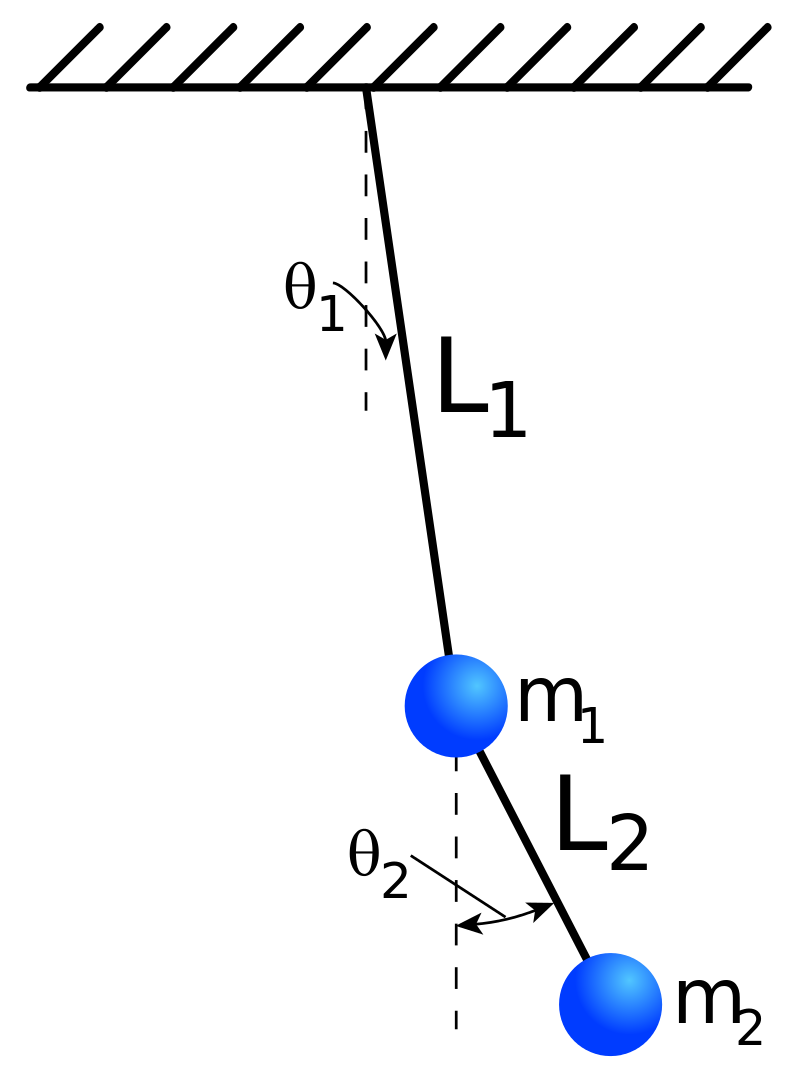

In [ ]:
import sympy as smp
from sympy import pi
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import odeint
from matplotlib import animation
from IPython.display import HTML
#!pip install --upgrade scipy

In [ ]:
## all needed symbols
t, g = smp.symbols('t g')
m1, m2 = smp.symbols('m1 m2')
L1, L2 = smp.symbols('L1, L2')
C = smp.symbols('C') #Damping factor from Rayleigh’s Dissipation function :
                      #chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=https%3A%2F%2Fweb.mst.edu%2F~stutts%2FSupplementalNotes%2FEL10.pdf&clen=287124&chunk=true
M = smp.symbols("M")
the1, the2 = smp.symbols(r'\theta_1, \theta_2', cls=smp.Function)
the1 = the1(t)
the2 = the2(t)
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)
x1 = L1*smp.sin(the1)
y1 = -L1*smp.cos(the1)
x2 = L1*smp.sin(the1)+L2*smp.sin(the2)
y2 = -L1*smp.cos(the1)-L2*smp.cos(the2)

In [ ]:
# Kinetic
T1 = (1/2) * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2)
T2 = (1/2) * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2)
T = T1+T2
# Potential
V1 = m1*g*y1
V2 = m2*g*y2
V = V1 + V2
# Lagrangian
L = (T-V).simplify()

In [ ]:
LE1 = (smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t)-C*the1_d).simplify()
LE2 = (smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t)-M-C*the2_d).simplify()

In [ ]:
LE1

-1.0*C*Derivative(\theta_1(t), t) - 1.0*L1**2*m1*Derivative(\theta_1(t), (t, 2)) - 1.0*L1**2*m2*Derivative(\theta_1(t), (t, 2)) - 1.0*L1*L2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 - 1.0*L1*L2*m2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) - 1.0*L1*g*m1*sin(\theta_1(t)) - 1.0*L1*g*m2*sin(\theta_1(t))

In [ ]:
LE2

-1.0*C*Derivative(\theta_2(t), t) + 1.0*L1*L2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 - 1.0*L1*L2*m2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) - 1.0*L2**2*m2*Derivative(\theta_2(t), (t, 2)) - 1.0*L2*g*m2*sin(\theta_2(t)) - 1.0*M

In [ ]:
sols = smp.solve([LE1, LE2], (the1_dd, the2_dd),
                simplify=True, rational=False)
f1 = sols[the1_dd]
f2 = sols[the2_dd]

In [ ]:
f1

(1.0*C*L1*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t) - 1.0*C*L2*Derivative(\theta_1(t), t) - 0.5*L1**2*L2*m2*sin(2*\theta_1(t) - 2*\theta_2(t))*Derivative(\theta_1(t), t)**2 - 1.0*L1*L2**2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 - 1.0*L1*L2*g*m1*sin(\theta_1(t)) - 0.5*L1*L2*g*m2*sin(\theta_1(t) - 2*\theta_2(t)) - 0.5*L1*L2*g*m2*sin(\theta_1(t)) + 1.0*L1*M*cos(\theta_1(t) - \theta_2(t)))/(L1**2*L2*(m1 - m2*cos(\theta_1(t) - \theta_2(t))**2 + m2))

In [ ]:
f2

(-1.0*C*L1*m1*Derivative(\theta_2(t), t) - 1.0*C*L1*m2*Derivative(\theta_2(t), t) + 1.0*C*L2*m2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t) + 1.0*L1**2*L2*m1*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + 1.0*L1**2*L2*m2**2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + 0.5*L1*L2**2*m2**2*sin(2*\theta_1(t) - 2*\theta_2(t))*Derivative(\theta_2(t), t)**2 + 0.5*L1*L2*g*m1*m2*sin(2*\theta_1(t) - \theta_2(t)) - 0.5*L1*L2*g*m1*m2*sin(\theta_2(t)) + 0.5*L1*L2*g*m2**2*sin(2*\theta_1(t) - \theta_2(t)) - 0.5*L1*L2*g*m2**2*sin(\theta_2(t)) - 1.0*L1*M*m1 - 1.0*L1*M*m2)/(L1*L2**2*m2*(m1 - m2*cos(\theta_1(t) - \theta_2(t))**2 + m2))

In [ ]:
dz1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d,M,C), f1)
dz2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d,M,C), f2)
dthe1dt_f = smp.lambdify(the1_d, the1_d)
dthe2dt_f = smp.lambdify(the2_d, the2_d)

In [ ]:
def dSdt(S, t, g, m1, m2, L1, L2, M, C):
    the1, z1, the2, z2 = S
    return [
        dthe1dt_f(z1),
        dz1dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2, M, C),
        dthe2dt_f(z2),
        dz2dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2, M, C),
    ]

In [ ]:
t = np.linspace(0, 40, 1001)
g = 9.81
m1=1
m2=1
L1 = 2
L2 = 2
C = 0
M = 0
ans = odeint(dSdt, y0=[4, 0, 2, 0], t=t, args=(g,m1,m2,L1,L2,M,C))
the1 = ans.T[0]
the2 = ans.T[2]

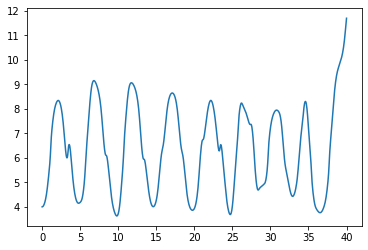

In [ ]:
plt.plot(t,the1)

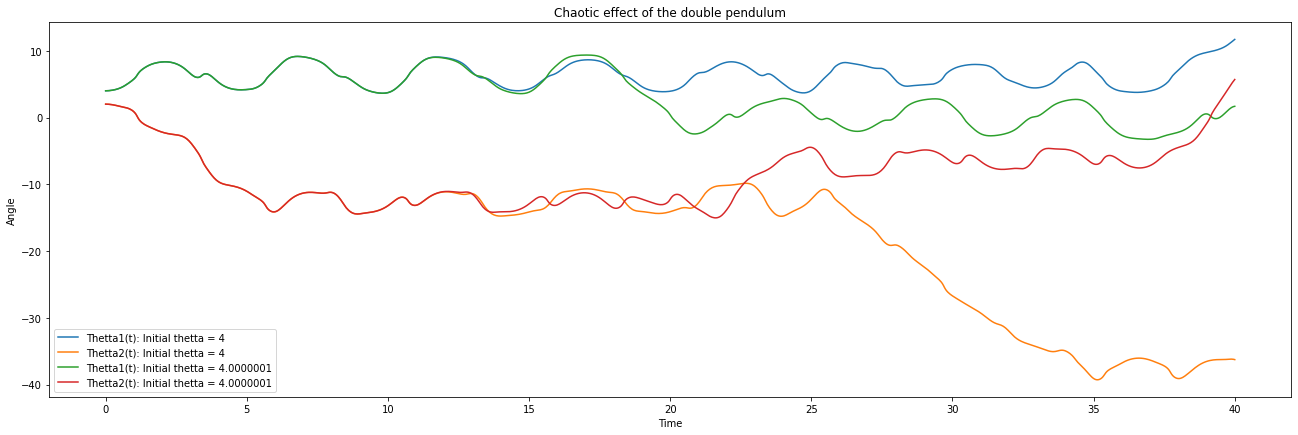

In [ ]:
ansprime = odeint(dSdt, y0=[4.0000001, 0, 2, 0], t=t, args=(g,m1,m2,L1,L2,M,C))
the1prime = ansprime.T[0]
the2prime = ansprime.T[2]
plt.plot(t,the1, label="Thetta1(t): Initial thetta = 4")
plt.plot(t,the2, label="Thetta2(t): Initial thetta = 4")
plt.plot(t,the1prime, label="Thetta1(t): Initial thetta = 4.0000001")
plt.plot(t,the2prime, label="Thetta2(t): Initial thetta = 4.0000001")
plt.title("Chaotic effect of the double pendulum")
plt.xlabel("Time")
plt.ylabel("Angle")
plt.legend()
plt.subplots_adjust(bottom=0.1, right=3, top=1.4)

In [ ]:
def get_x1y1x2y2(t, the1, the2, L1, L2):
    return (L1*np.sin(the1),
            -L1*np.cos(the1),
            L1*np.sin(the1) + L2*np.sin(the2),
            -L1*np.cos(the1) - L2*np.cos(the2))

x1, y1, x2, y2 = get_x1y1x2y2(t, ans.T[0], ans.T[2], L1, L2)
x1p, y1p, x2p, y2p = get_x1y1x2y2(t, ansprime.T[0], ansprime.T[2], L1, L2)

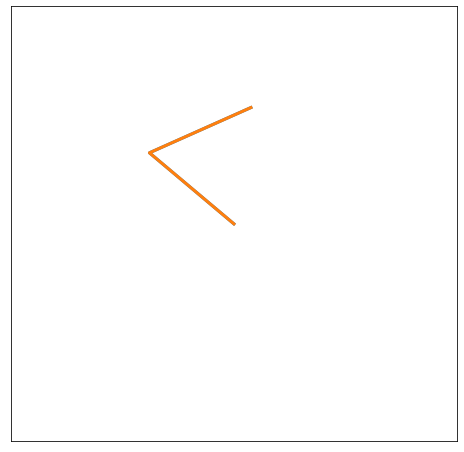

In [ ]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    ln2.set_data([0, x1p[i], x2p[i]], [0, y1p[i], y2p[i]])    
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
#ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], lw=3, markersize=8)
ln2, = plt.plot([], [], lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
HTML(ani.to_html5_video())